<a href="https://colab.research.google.com/github/ParsaMohammadpour/chain-store-prediction/blob/main/chain-store-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Both english and persian explanations are provided.<br/>

هم توضیحات فارسی و هم انگلیسی را قرار می دهیم.

# Importing libraries we are going to use

In here we just import libraries. Some of these libraries were just added for testing or were being used in some part of code for local testing or other reasons. And they might not be needed now.<br/><br/>
در اینجا صرفا library هایی را که از آنها استفاده می کنیم را import می کنیم. البته بعضی از این library ها صرفا برای مقاطعی و یا برای تست کردن اضافه شده بودند و الآن مورد استفاده نیستند.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
from sklearn.model_selection import learning_curve
import shap
import time

# Loading dataframes

In this section, we just load datasets.<br/><br/>
در این قسمت به load کردن dataframe ها می پردازیم.

### Train Dataset

In [ ]:
df = pd.read_csv('sales_train.csv')
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


### Shop Dataset

In [ ]:
shops = pd.read_csv('shops.csv')
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


### Categories Dataset

In [ ]:
categories = pd.read_csv('item_categories.csv')
categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


### Items Dataset

In [ ]:
items = pd.read_csv('items.csv')
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


# Merging all dataframes into one

In this section we merge all loaded datasets by they relevant keys and also store different datas for a record such as item_category_id and etc.<br/><br/>


در این قسمت تمام dataframe هایی را که در قسمت قبل load کرده بودیم با هم merge می کنیم تا برای هر record داده هایی نظیر item_category_id و .. را داشته باشیم. (البته در ادامه تنها از همین item_category_id استفاده می کنیم.)

In [ ]:
df = pd.merge(df, shops, on='shop_id')
df = pd.merge(df, items, on='item_id')
df = pd.merge(df, categories, on='item_category_id')
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
...,...,...,...,...,...,...,...,...,...,...
2935844,22.10.2015,33,55,13093,250.0,1.0,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 250 рублей [Цифровая вер...,36,Карты оплаты - Windows (Цифра)
2935845,21.09.2015,32,55,13091,1000.0,1.0,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 1000 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)
2935846,16.09.2015,32,55,13094,2500.0,1.0,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)
2935847,22.09.2015,32,55,13094,2500.0,2.0,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)


# Get Rid Of Useless Columns Like Names

In this section we remove columns like names from dataset to be able to perform actions on it faster.<br/><br/>

در این قسمت ستون هایی مانند name ها را از dataframe حذف می کنیم.
این کار برای سبک تر شدن dataframe می باشد تا عملیات ها سریع تر انجام شوند.

In [ ]:
df = df.loc[:, ~df.columns.isin(['item_category_name', 'item_name', 'shop_name'])]
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,37
1,02.01.2013,0,25,22154,999.0,1.0,37
2,03.01.2013,0,25,22154,999.0,1.0,37
3,20.01.2013,0,25,22154,999.0,1.0,37
4,23.01.2013,0,25,22154,999.0,1.0,37
...,...,...,...,...,...,...,...
2935844,22.10.2015,33,55,13093,250.0,1.0,36
2935845,21.09.2015,32,55,13091,1000.0,1.0,36
2935846,16.09.2015,32,55,13094,2500.0,1.0,36
2935847,22.09.2015,32,55,13094,2500.0,2.0,36


# Correcting columns with negative value

Now, we have columns that have an invalid values, for example they have negative value for item_price and item_cnt_day. So first we iterate all over the dataset and replace these negative values with `np.Nan` and then by using `SimpleImputer` class, we replace them by using mean strategy.<br/><br/>

در این dataframe، ما تعدادی داده با فروش منفی و قیمت منفی داریم، که قطعا نمی توانند منفی باشند این دو مقدار.
پس کل dataframe را پیمایش می کنیم و داده هایی که منفی هستند را حذف می کنیم و به جای آن ها، np.nan قرار می دهیم.
سپس با استفاده از SimpleImputer به جای داده هایی که مقدار آن ها np.nan می باشد، مقدار میانگیبن آن ستون را قرار می دهیم.

In [ ]:
# replacing negative values of item_price & item_cnt_day with np.nan
df = df.applymap(lambda x: x if isinstance(x, str) or x >= 0 else np.nan)
print(df.columns[df.isna().any()].tolist())

imp = SimpleImputer(missing_values=np.NaN, strategy="mean")
df.item_price = imp.fit_transform(df['item_price'].values.reshape(-1, 1))[:,0]
df.item_cnt_day = imp.fit_transform(df['item_cnt_day'].values.reshape(-1, 1))[:,0]

print('Columns with np.Nan values:\n', df.columns[df.isna().any()].tolist())
print('df:\n')
df

['item_price', 'item_cnt_day']
Columns with np.Nan values:
 []
df:



,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,37
1,02.01.2013,0,25,22154,999.0,1.0,37
2,03.01.2013,0,25,22154,999.0,1.0,37
3,20.01.2013,0,25,22154,999.0,1.0,37
4,23.01.2013,0,25,22154,999.0,1.0,37
...,...,...,...,...,...,...,...
2935844,22.10.2015,33,55,13093,250.0,1.0,36
2935845,21.09.2015,32,55,13091,1000.0,1.0,36
2935846,16.09.2015,32,55,13094,2500.0,1.0,36
2935847,22.09.2015,32,55,13094,2500.0,2.0,36


# Adding Month Column

In this section from date column, we generate a new column and set its name to month. we did it because in one month of the year we can have more sale for an item in comparison to other months.
In future sections, we are going to one-hot this colum.<br/><br/>

در این قسمت از روی ستون date، ستون month را می سازیم که نشان دهنده عدد ماه در سال می باشد.
این کار برای این است که ممکن است یک item، در یک فصل یا ماه خاصی از سال فروش بیشتری داشته باشد، بنابر این این ستون را ایجاد می کنیم.(که در ادامه همین ستون را one-hot می کنیم.)

In [ ]:
df['month'] = df['date'].str[3:5].astype(int)
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,month
0,02.01.2013,0,59,22154,999.0,1.0,37,1
1,02.01.2013,0,25,22154,999.0,1.0,37,1
2,03.01.2013,0,25,22154,999.0,1.0,37,1
3,20.01.2013,0,25,22154,999.0,1.0,37,1
4,23.01.2013,0,25,22154,999.0,1.0,37,1
...,...,...,...,...,...,...,...,...
2935844,22.10.2015,33,55,13093,250.0,1.0,36,10
2935845,21.09.2015,32,55,13091,1000.0,1.0,36,9
2935846,16.09.2015,32,55,13094,2500.0,1.0,36,9
2935847,22.09.2015,32,55,13094,2500.0,2.0,36,9


# Finding Max Date And Max date_block_num

In this section, we print sorted unique dates. Because we want to know how many unique date and how many unique months we have in this dataset.<br/><br/>

در این قسمت تمام تاریخ های غیر تکراری را به صورت sort شده چاپ می کنیم تا بتوانیم تاریخ ماه بعدی ای که باید تعداد فروش هر کالا در آن را حساب کنیم، داشته باشیم. (بتوانیم
بفهمیم ماه چندم سال است.)
همچنین همین کار را هم با ستون date_block_num تکرار می کنیم تا شماره ماه بعدی را نیز داشته باشیم. در حالت قبل می خواستیم فقط ببینیم ماه چندم سال است ولی در این قسمت می خواهیم ببینیم که چندمین ماهی است که قرار است دیتاهایش را پیش بینی کنیم.)

In [ ]:
dates_list = [time.strftime('%Y.%m.%d', i) for i in sorted([time.strptime(i, '%d.%m.%Y') for i in df['date'].unique()])]
print('dates:\n', dates_list)
date_block_num_list = sorted(df['date_block_num'].unique())
print('date_block_num:\n', date_block_num_list)

dates:
 ['2013.01.01', '2013.01.02', '2013.01.03', '2013.01.04', '2013.01.05', '2013.01.06', '2013.01.07', '2013.01.08', '2013.01.09', '2013.01.10', '2013.01.11', '2013.01.12', '2013.01.13', '2013.01.14', '2013.01.15', '2013.01.16', '2013.01.17', '2013.01.18', '2013.01.19', '2013.01.20', '2013.01.21', '2013.01.22', '2013.01.23', '2013.01.24', '2013.01.25', '2013.01.26', '2013.01.27', '2013.01.28', '2013.01.29', '2013.01.30', '2013.01.31', '2013.02.01', '2013.02.02', '2013.02.03', '2013.02.04', '2013.02.05', '2013.02.06', '2013.02.07', '2013.02.08', '2013.02.09', '2013.02.10', '2013.02.11', '2013.02.12', '2013.02.13', '2013.02.14', '2013.02.15', '2013.02.16', '2013.02.17', '2013.02.18', '2013.02.19', '2013.02.20', '2013.02.21', '2013.02.22', '2013.02.23', '2013.02.24', '2013.02.25', '2013.02.26', '2013.02.27', '2013.02.28', '2013.03.01', '2013.03.02', '2013.03.03', '2013.03.04', '2013.03.05', '2013.03.06', '2013.03.07', '2013.03.08', '2013.03.09', '2013.03.10', '2013.03.11', '2013.03.12

# Making Price Dataframe To Be Used For Test Dataset

In this section, we are going to generate a new dataset from our original dataset wich it contains means items priceof each store. It means what is the mean price of an item in an specific store.<br/><br/>

در این قسمت میانگین قیمت هر کالا را در هر کدام از مغازه های ارائه دهنده آن کالا به صورت یک dataframe نگه می داریم تا بتوانیم قیمت داده های تست را از روی این مقادیر مقدار دهی کنیم.

In [ ]:
price_df = df.groupby(['item_id', 'shop_id'])['item_price'].mean().reset_index(name='item_price')
price_df

,item_id,shop_id,item_price
0,0,54,58.0
1,1,55,4490.0
2,2,54,58.0
3,3,54,79.0
4,4,54,58.0
...,...,...,...
424119,22168,12,799.0
424120,22168,16,799.0
424121,22168,42,799.0
424122,22168,43,798.5


# Finding Of Each Shop Sell Summation Of Each Item

We need to predict number of sold items in a month, but in our dataframe we have numbers of these counts for each day. So we need to calculate total-cell count of each item at each store. The commented code is just for testing this `groupby` statement.<br/><br/>

ما در dataframe  اصلی مان، تعداد فروش هر کالا در هر روز را دایم. اما ما باید تعداد فروش هر کالا در هر ماه را پیش بینی کنیم پس با استفاده از یک دستور groupby مجموع فروش ماهانه هر کالا در هر فروشگاه را حساب می کنیم.
تیکه کدی که در پایین به صورت کامنت وجود دارد صرفا برای تست کردن این دستور gropupby است.

In [ ]:
groupby_keep_columns = ['item_id', 'item_category_id', 'shop_id', 'date_block_num', 'month', 'item_price']
df = df.groupby(groupby_keep_columns)['item_cnt_day'].sum().reset_index(name='total-sell')
df

# This Part Was Only Added For Test
# a = df.groupby(['item_id', 'item_category_id', 'shop_id', 'date_block_num', 'month', 'item_price'])['item_cnt_day'].sum().reset_index(name='total-sell')
# b = df.loc[df['item_id'] == 22145]
# b = b.loc[b['shop_id'] == 25]
# b = b.loc[b['date_block_num'] == 14]
# print(len(b))
# print(b)
# print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
# b = a.loc[a['item_id'] == 22145]
# b = b.loc[b['shop_id'] == 25]
# b = b.loc[b['date_block_num'] == 14]
# print(len(b))
# print(b)

,item_id,item_category_id,shop_id,date_block_num,month,item_price,total-sell
0,0,40,54,20,9,58.0,1.0
1,1,76,55,15,4,4490.0,2.0
2,1,76,55,18,7,4490.0,1.0
3,1,76,55,19,8,4490.0,1.0
4,1,76,55,20,9,4490.0,1.0
...,...,...,...,...,...,...,...
1739017,22168,62,12,8,9,799.0,1.0
1739018,22168,62,16,1,2,799.0,1.0
1739019,22168,62,42,1,2,799.0,1.0
1739020,22168,62,43,2,3,798.5,1.0


# One-Hot-Encode for month, shop & item_category_id

Now, we need to perform one-hot encode for some columns such as month(we added this column before), shop and item_category_id. Because we know that for example some item category might have a higher id, but it doesn't mean that they are more/less expensive in this order. It might affect the price and number of total-sell, but not exactly the order that they have at their id.(we didn't apply this action for item id because our columns could gets too many thath we couldn't perform any action on them.)<br/><br/>

می دانیم که id کالا ها نسبت به یکدیگر برتری ندارند و بهتر است که به صورت ترتیبی نباشند چون ممکن است نشان دهنده برتری یکی نسبت به دیگری باشد در حالی که اینطور نیست (سر کلاس بحث شد)
به همین دلیل برای آن ها (item_id, shop_id, month, item_category_id) زا روش one-hot استفاده می کنیم.
برای خود item_id از این روش استافده نکردیم به دلیل اینکه تعداد ستون هایمان خیلی زیاد می شد.

In [ ]:
df = pd.get_dummies(df, prefix=['month', 'shop', 'category'], columns = ['month', 'shop_id', 'item_category_id'])
df

,item_id,date_block_num,item_price,total-sell,month_1,month_2,month_3,month_4,month_5,month_6,...,category_74,category_75,category_76,category_77,category_78,category_79,category_80,category_81,category_82,category_83
0,0,20,58.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,15,4490.0,2.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,18,4490.0,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,19,4490.0,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,20,4490.0,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739017,22168,8,799.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739018,22168,1,799.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739019,22168,1,799.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739020,22168,2,798.5,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting Dataset Into Train & Test Part

In here, we split the dataset into train and test. we put 95 percent of our data for training and the rest for testing.<br/><br/>

در اینجا با استافده از train_test_split می آیم و dataframe اصلی را به دو قسمت train و test به نسبت 95 به 5 تقسیم می کنیم.

In [ ]:
print(df.columns)
columns = ['item_id', 'item_price', 'date_block_num']
[columns.append('month_' + str(i)) for i in range(1, 13)]
[columns.append('shop_' + str(i)) for i in range(0, 60)]
[columns.append('category_' + str(i)) for i in range(0,84)]
x = df.loc[:, columns]
y = df.loc[:, 'total-sell']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.05)
print('train_x:\n', len(train_x))
print('train_y:\n', len(train_y))
print('test_x:\n', len(test_x))
print('test_y:\n', len(test_y))

Index(['item_id', 'date_block_num', 'item_price', 'total-sell', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       ...
       'category_74', 'category_75', 'category_76', 'category_77',
       'category_78', 'category_79', 'category_80', 'category_81',
       'category_82', 'category_83'],
      dtype='object', length=160)
train_x:
 1652070
train_y:
 1652070
test_x:
 86952
test_y:
 86952


# Linear regression

In this part, we make `LinearRegression` module and perform training on it. Then we evaluate our result (training result) with the test sets that we separated in previous section. Then we show our prediction result on 100 of our results.<br/><br/>

در این قسمت ماژول  linear regression را می سازیم و با استفاده از آن مدل را train می کنیم.
سپس با استفاده از داده های test که در قسمت قبل از کل داده های train جدا کرده بودیم، مدلمان را ارزیابی می کنیم.
سپس برای نشان دادن کارایی مدل، نموداری از نتیجه پیش بینی مدل بر روی 100 تا از داده های test را بر روی نمودار نشان می دهیم.

Score: 
 0.2885278486871625
Coefficients: 
 [-6.30126859e-06  1.76258323e-04 -1.44056772e-02 -4.08489421e-02
 -1.33900442e-01 -3.14719225e-02 -1.14943933e-01 -1.76427961e-01
 -1.42463790e-01 -1.95289353e-01 -1.73548220e-01  1.26011321e-01
  8.70928834e-02  3.00035710e-01  4.95754650e-01 -1.10105438e+00
 -1.67776189e+00 -2.18971821e+00 -2.33241725e+00 -2.04763983e+00
 -2.05625556e+00 -1.57163698e+00 -1.79741591e+00 -2.17436484e+00
  4.47612544e+00 -2.38991906e+00 -2.34775802e+00 -1.09029303e+00
 -1.97927974e+00 -1.88150074e+00 -1.65783724e+00 -1.86625939e+00
 -2.06808397e+00 -1.72397749e+00 -1.76652209e+00  3.22874591e+00
 -1.84489017e+00 -1.96713156e+00 -1.96259938e+00 -1.71401768e+00
 -8.70550559e-01 -1.74744249e+00 -1.00148489e+00 -8.49434227e-01
 -1.70289708e+00 -1.80576677e+00 -5.52259124e-01 -2.13663747e+00
 -2.46881660e+00 -2.78273220e+00 -2.13375326e+00 -2.75543186e+00
 -1.96559575e+00 -1.93798979e+00 -2.17344977e+00 -2.11220763e+00
 -1.96023464e+00 -1.15553932e+00 -1.67848789e+

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


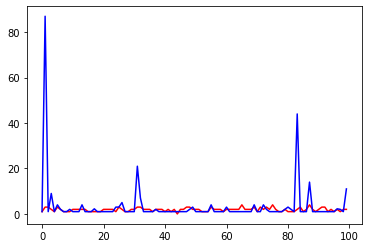

In [ ]:
regr = LinearRegression()
# reger = Lasso(alpha=0.001)

regr.fit(train_x, train_y)
print("Score: \n", regr.score(test_x, test_y))

y_predict = regr.predict(test_x)
y_predict = np.around(y_predict).astype(int)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_y, y_predict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_y, y_predict))

plt.plot([i for i in range(100)], y_predict[:100], color='red')
plt.plot([i for i in range(100)], test_y[:100], color='blue')
plt.show()

# Learning Curve

Here, we draw our learning curve by the help of `learning_curve`. But because of memory limit, we only used first 1000 results.<br/><br/>

در این قسمت با سرپ بسیار زیاد learning curve مدل ساخته شده مان را رسم میکنیم.
(در این بخش و بخش استفاده از کتابخانه shap، به دلیل محدودیت memory  سیستم، مجمور شدیم که یک سری از عملیات ها را تنها بر روی 1000 تا از داده های train و یا test انجام دهیم. استفاده از colab هم ممکن نبود به دلیل اینکه نمی توانستیم در آن جا فایلی upload کنیم.)

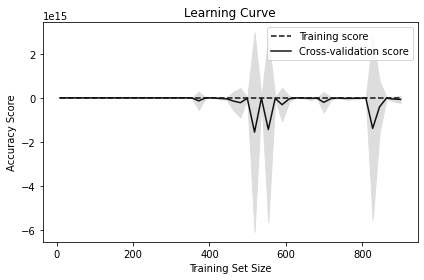

In [ ]:
"""We Also Reduced Dataset lenght Because It Took Very Long To Answer With The Complete Dataset
    & My System Didn't Have Enough Memory For"""
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(LinearRegression(),
                                                        train_x.iloc[:1000],
                                                        train_y.iloc[:1000],
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
#                                                         scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# SHAP Library For Evaluating

In this part, by using the SHAP library, we see how does our mode work. For this purpose, we draw (plot) 4 of SHAP existing plots.<br/>
As we can see from the plots, some features have more impact on the result in comparison to others which is obvious in plots.<br/><br/>

در این قسمت با ساتفاده از کتابخانه shap میبینیم که مدلمان چگونه عمل می کند.
برای این کار هم 4 تا از نمودار های موجود در کتابخانه shap را برای مدلمان رسم میکنیم.
همانطور که در نمودار ها هم قابل مشاهده است یک سری از feature ها تاثییرات بیشتری بر روی مدل می گذارند و یک سری ها تاثییرات کمتری دارند.
البته نحوه نشان دادن این موضوع در نمودار های مختلف متفاوت است.

### Initializing Models And Variables For Shap

In [ ]:
shap.initjs()
explainer = shap.KernelExplainer(regr.predict, test_x.iloc[:1000])
shap_values = explainer.shap_values(test_x.iloc[0,:])

X does not have valid feature names, but LinearRegression was fitted with feature names
Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set 

### force_plot

In [ ]:
shap.force_plot(explainer.expected_value, shap_values, test_x.iloc[0,:])

### summary_plot

  0%|          | 0/1000 [00:00<?, ?it/s]

X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
The default of 'norma

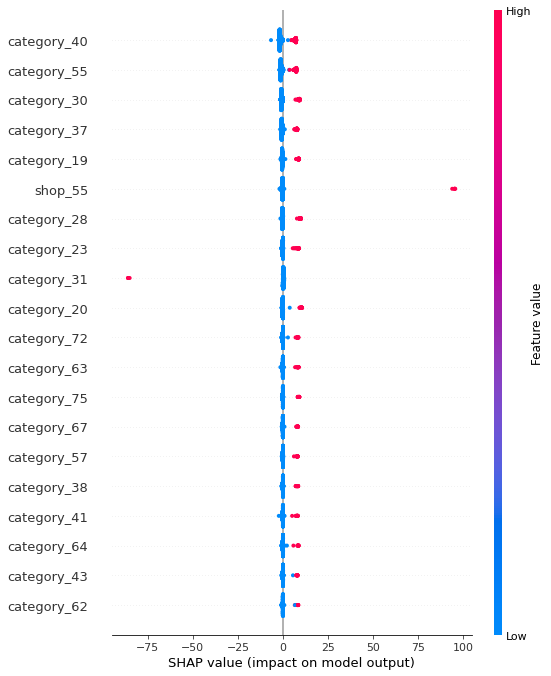

In [ ]:
# shap.summary_plot(shap_values, test_x.iloc[:1000], feature_names=columns, plot_type="bar")
# shap.summary_plot(explainer.expected_value, shap_values[0])
# shap.summary_plot(shap_values, test_x.iloc[:1000])
shap.summary_plot(explainer.shap_values(test_x.iloc[:1000], nsamples=100), test_x.iloc[:1000])

### bar plots

In [ ]:
bar_explainer = shap.Explainer(regr, test_x.iloc[:1000])
bar_shap_values = bar_explainer(test_x.iloc[:1000])

#### bar plot ( mean(| shap_value |) )

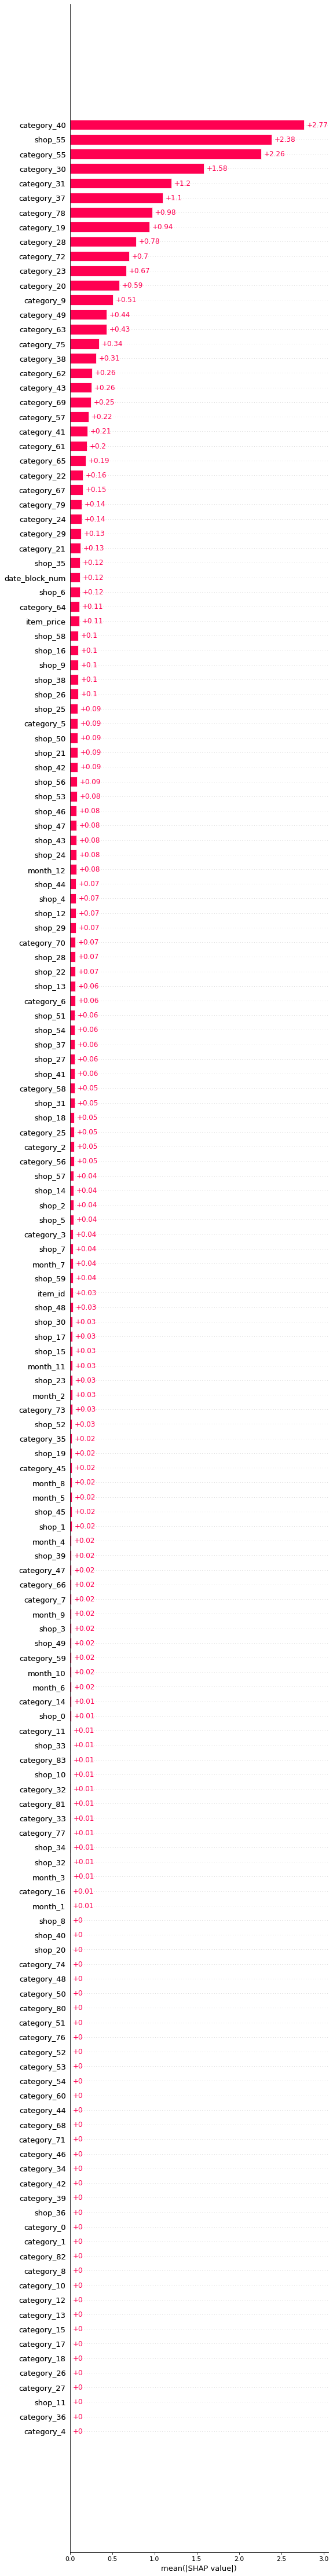

In [ ]:
shap.plots.bar(bar_shap_values, max_display=500)

#### bar plot ( shap_value )

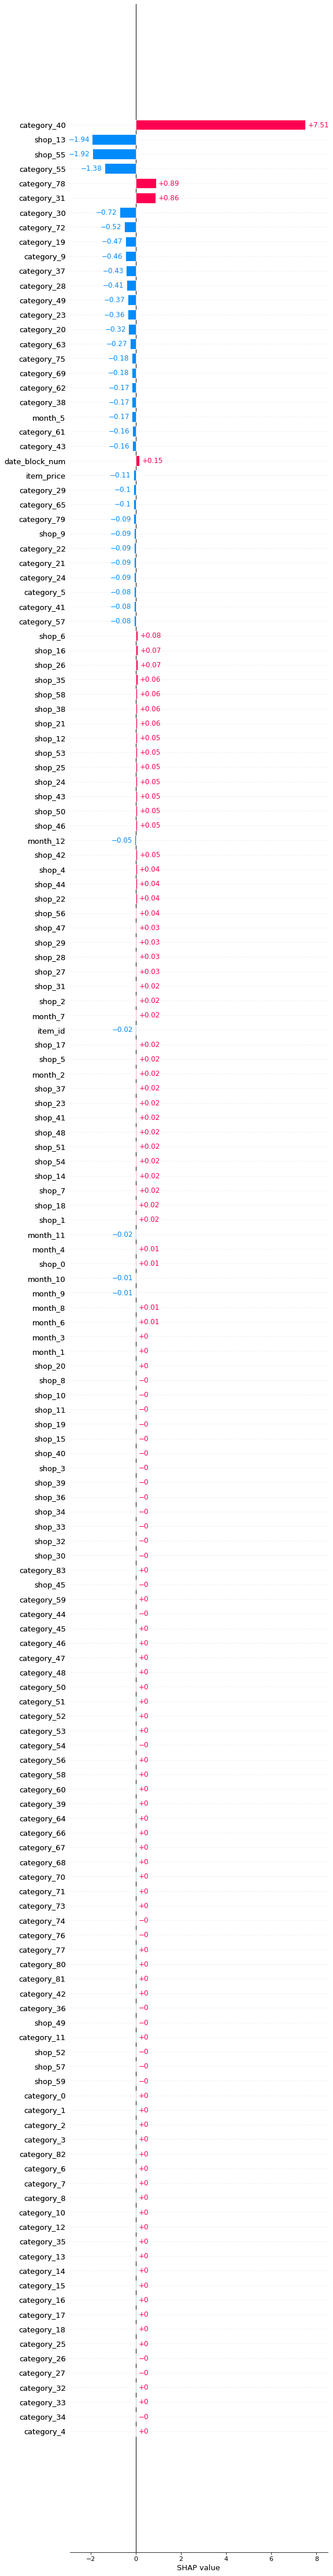

In [ ]:
shap.plots.bar(bar_shap_values[0], max_display=500)

# Predicting Test

Now, in this part we use our model to predict the datas in the test dataset. But first we need to imply some changes to the dataset in order to be able to give our dataset to our linear regression model.<br/><br/>

در این قسمت از مدلمان برای پیش بینی داده های موجود در فایل test استفاده می کنیم.
اما ابتدا باید تغییراتی را بر روی فیال test اعمال کنیم به طوری که بتوانیم آن را به صورت یک dataframe به مدل linear regression مان بدهیم.

### Reading Test Set

Reading dataframes.<br/><br/>

در این قسمت dataframe را زا روی فایل می خوانیم.

In [ ]:
test_df = pd.read_csv('test.csv')
test_df

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


### Adding Item Category

In this section, we add item_category_id to each record by `pd.merge`, because we only used that in our model.<br/><br/>

در این قسمت item_category_id را برای هر record اضافه می کنیم با استفاده از merge کردن با dataframe عه items، اما فقط از item_id و item_category_id استفاده می کهنیم.
چون در مدلمان هم فقط از همین دو تا استفاده کردذیم.

In [ ]:
test_df = pd.merge(test_df, items.loc[:, ['item_id', 'item_category_id']], on='item_id')
test_df

,ID,shop_id,item_id,item_category_id
0,0,5,5037,19
1,5100,4,5037,19
2,10200,6,5037,19
3,15300,3,5037,19
4,20400,2,5037,19
...,...,...,...,...
214195,193799,46,969,37
214196,198899,41,969,37
214197,203999,44,969,37
214198,209099,39,969,37


### Making Price For Each Item In Each Shop

In here, as we explained before, by using `price_df` we add mean price of each item in each store from previous month.<br/><br/>

همغانطور که در بالاتر توضیح داده شد، در اینجا از price_df که میانگین قیمت کالای هر فروشگاه است، استفاده می کنیم و به هر record میانگین قیمت آن کالای فروشگاه در ماه های گذشته را می دهیم.

In [ ]:
test_df = pd.merge(test_df, price_df, on=['item_id', 'shop_id'])
test_df

,ID,shop_id,item_id,item_category_id,item_price
0,0,5,5037,19,1633.692308
1,5100,4,5037,19,1836.583333
2,10200,6,5037,19,2213.705882
3,15300,3,5037,19,2241.105263
4,20400,2,5037,19,1857.375000
...,...,...,...,...,...
111399,193799,46,969,37,482.000000
111400,198899,41,969,37,549.000000
111401,203999,44,969,37,461.250000
111402,209099,39,969,37,398.000000


### Adding month, shop, category & date_block_num columns

As we explained before, we just add all those columns to it (we added some columns to it for month, shop, category and date_block_num with one-hot) and only mark thoese which are valid for our current month that we are making a prediction for it as one, and zero for others.<br/><br/>

همانطور که در بالاتر یک بار max عه date ها و date_block_num را بدست آورده بودیم، الآن از آن استفاده می کنیم و ستون Month و date_block_num را برای این دیتای test می سازیم.
همچنین ستون shop_id, category_id, month را هم همانطور که برای دیتای train مان one-hot کرده بودیم، اینجا هم one-hot می کنیم.

In [ ]:
"""The month that we need to predict is 2015.11 with date_block_num 34"""
for i in range(0, 13):
    test_df['month_' + str(i)] = 0 if i!= 11 else 1

for i in range(0, 60):
    test_df['shop_' + str(i)] = np.where(test_df['shop_id'] == (i+1), 1, 0)

for i in range(0, 84):
    test_df['category_' + str(i)] = np.where(test_df['item_category_id'] == (i+1), 1, 0)

test_df['date_block_num'] = 34
test_df

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

,ID,shop_id,item_id,item_category_id,item_price,month_0,month_1,month_2,month_3,month_4,...,category_75,category_76,category_77,category_78,category_79,category_80,category_81,category_82,category_83,date_block_num
0,0,5,5037,19,1633.692308,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
1,5100,4,5037,19,1836.583333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
2,10200,6,5037,19,2213.705882,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
3,15300,3,5037,19,2241.105263,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
4,20400,2,5037,19,1857.375000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111399,193799,46,969,37,482.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
111400,198899,41,969,37,549.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
111401,203999,44,969,37,461.250000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
111402,209099,39,969,37,398.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34


# Fitting The Whole Dataset & Predictiong The Test

Here, we wanted to train our system again with whole dataset but due to memory restriction, we couldn't do that.(we ran into numbers of problems, for example not enough memory (enough memory), not being able to upload anything and ...)<br/>So here we only use our previously trained model and put the prediction in prediction file.<br/><br/>

در این قسمت هم می خواستیم که یک بار دیگر مدلمان را train کنیم این بار با تمام دیتای train اما به دلیل محدودیت های سیستم این کار قابل انجام دادن نبود. (not enough memory می گرفتیم و همچنین در colab هم نمی تواسنیم چیزی upload کنیم. البته کد مربوط به این قسمت به صورت کامنت قرار داده شده است.)
پس در این قسمت تنها از مدلی که قبلا train کرده بودیم با استفاده تنها بخشی از data، کار می کنیم و نتیجه را پیش بینی می کنیم و در فایل prediction قرار می دهیم.

In [ ]:
# reg = LinearRegression()

# reg.fit(x, y)
# print("Score:\n", reg.score(x, y))

# final_predict = reg.predict(test_df.iloc[:, columns])

"""If we want to get a better result we shoul uncomment higher lines and comment next line.
    But I don't have enough space for this"""
final_predict = regr.predict(test_df.loc[:, columns])

final_predict = np.around(final_predict).astype(int)
final_predict = np.abs(final_predict)

test_df['total-sell'] = final_predict

test_df.loc[:, ['ID', 'shop_id', 'item_id', 'total-sell']].to_csv('prediction.csv')

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
